In [1]:
from pyquil import Program
from pyquil.gates import *
program = Program(
    H(0),
    CNOT(0, 1),
)
print(program)


H 0
CNOT 0 1



In [2]:
from pyquil.paulis import sZ

z0 = (1-sZ(0))*0.5
z1 = (1-sZ(1))*0.5
xor = (1-sZ(0)*sZ(1))*0.5

In [4]:
from pyquil.api import WavefunctionSimulator

for observable in [z0, z1, xor]:
    expectation = WavefunctionSimulator().expectation(prep_prog=program, pauli_terms=observable)
    print(observable, '\t', expectation)

(0.5+0j)*I + (-0.5+0j)*Z0 	 (0.4999999999999999+0j)
(0.5+0j)*I + (-0.5+0j)*Z1 	 (0.4999999999999999+0j)
(0.5+0j)*I + (-0.5+0j)*Z0*Z1 	 0j


In [7]:
from pyquil.api import QVMConnection
import numpy as np
cxn = QVMConnection()
thetas = np.linspace(0, np.pi, 20)
bitstrings = [np.asarray(cxn.run_and_measure(Program(RY(theta, 0)), qubits=[0], trials=1000))
              for theta in thetas]

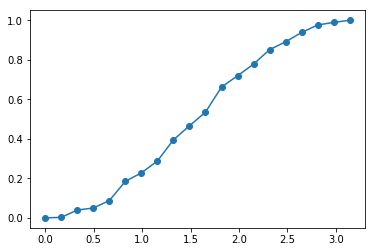

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

averages = [np.mean(bs[:,0]) for bs in bitstrings]
_ = plt.plot(thetas, averages, 'o-')

In [11]:
def ghz_state(qubits):
    """Create a GHZ state on the given list of qubits by applying
    a Hadamard gate to the first qubit followed by a chain of CNOTs
    """
    program = Program()
    program += H(qubits[0])
    for q1, q2 in zip(qubits, qubits[1:]):
        program += CNOT(q1, q2)
    return program

In [12]:
program = ghz_state(qubits=[0, 1, 2])
print(program)

H 0
CNOT 0 1
CNOT 1 2



In [13]:
from pyquil.api import WavefunctionSimulator
wfn = WavefunctionSimulator().wavefunction(program)
print(wfn)

(0.7071067812+0j)|000> + (0.7071067812+0j)|111>


In [1]:
from pyquil import get_qc
qc = get_qc('3q-qvm')
bitstrings = qc.run_and_measure(program, trials=10)

NameError: name 'program' is not defined

In [21]:
qc = get_qc('Aspen-0-3Q-B')
(qc, qc.qubits())

UnknownApiError: Lattice with name 'Aspen-0-3Q-B' not found.

The server has failed to return a proper response. Please describe the problem
and copy the above message into a GitHub issue at:
    https://github.com/rigetti/pyquil/issues

In [15]:
# qc.run_and_measure(ghz_state(qubits=[1,2,3]))

[0, 1, 2]

In [16]:
bitstrings = qc.run_and_measure(program, trials=10)
bitstrings

{0: array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1]),
 1: array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1]),
 2: array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1])}

In [17]:
import numpy as np
bitstring_array = np.vstack(bitstrings[q] for q in qc.qubits()).T
sums = np.sum(bitstring_array, axis=1)
sums

array([0, 0, 0, 3, 3, 3, 0, 0, 3, 3])

In [18]:
sample_is_ghz = np.logical_or(sums == 0, sums == 3)
sample_is_ghz

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [19]:
np.all(sample_is_ghz)

True

In [23]:
qc = get_qc('4q-qvm')
bitstrings = qc.run_and_measure(Program(X(0), X(1), X(2)), trials=10)
bitstrings

{0: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 1: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 2: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 3: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [24]:
np.vstack(bitstrings[q] for q in qc.qubits()).T

array([[1, 1, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 0]])

In [26]:
qc.qubits()

[0, 1, 2, 3]

In [27]:
qubits = [0, 1, 2]
np.vstack(bitstrings[q] for q in qubits).T

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [28]:
qc = get_qc('3q-noisy-qvm')
bitstrings = qc.run_and_measure(program, trials=10)
bitstrings

{0: array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0]),
 1: array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0]),
 2: array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0])}

In [29]:
bitstring_array = np.vstack(bitstrings[q] for q in qc.qubits()).T
sums = np.sum(bitstring_array, axis=1)
sums

array([3, 3, 1, 2, 3, 3, 3, 0, 3, 0])

In [30]:
from pyquil import list_quantum_computers
# TODO: unauthenticated endpoint
list_quantum_computers()

['Aspen-1-9Q-B',
 'Aspen-1-8Q-B',
 'Aspen-1-7Q-B',
 'Aspen-1-6Q-B',
 'Aspen-1-5Q-B',
 'Aspen-1-4Q-B',
 'Aspen-1-3Q-B',
 'Aspen-1-2Q-B',
 '9q-square-qvm',
 '9q-square-noisy-qvm']

/Users/igor/quantum/rigetti/ven/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


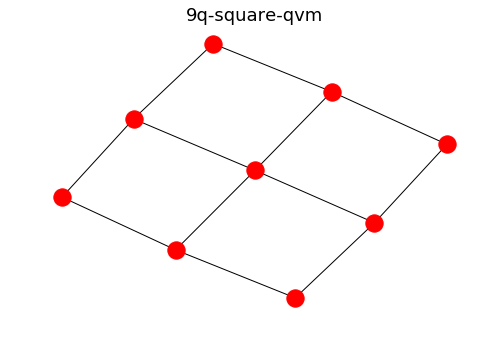

In [31]:
qc = get_qc('9q-square-qvm')
%matplotlib inline
import networkx as nx
nx.draw(qc.qubit_topology())
from matplotlib import pyplot as plt
_ = plt.title('9q-square-qvm', fontsize=18)

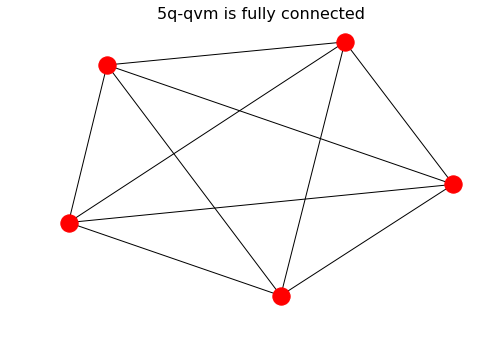

In [32]:
nx.draw(get_qc('5q-qvm').qubit_topology())
_ = plt.title('5q-qvm is fully connected', fontsize=16)

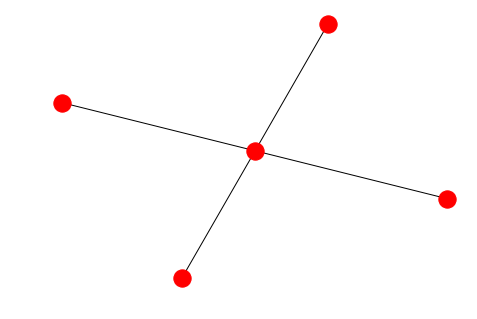

In [33]:
topology = nx.from_edgelist([
    (10, 2),
    (10, 4),
    (10, 6),
    (10, 8),
])
from pyquil.device import NxDevice
device = NxDevice(topology)

from pyquil.api._qac import AbstractCompiler
class MyLazyCompiler(AbstractCompiler):
    def quil_to_native_quil(self, program):
        return program

    def native_quil_to_executable(self, nq_program):
        return nq_program


from pyquil.api import QuantumComputer, QVM, ForestConnection
my_qc = QuantumComputer(
    name='my-qvm',
    qam=QVM(connection=ForestConnection()),
    device=device,
    compiler=MyLazyCompiler(),
)

nx.draw(my_qc.qubit_topology())

In [34]:
my_qc.run_and_measure(Program(X(10)), trials=5)

{2: array([0, 0, 0, 0, 0]),
 4: array([0, 0, 0, 0, 0]),
 6: array([0, 0, 0, 0, 0]),
 8: array([0, 0, 0, 0, 0]),
 10: array([1, 1, 1, 1, 1])}